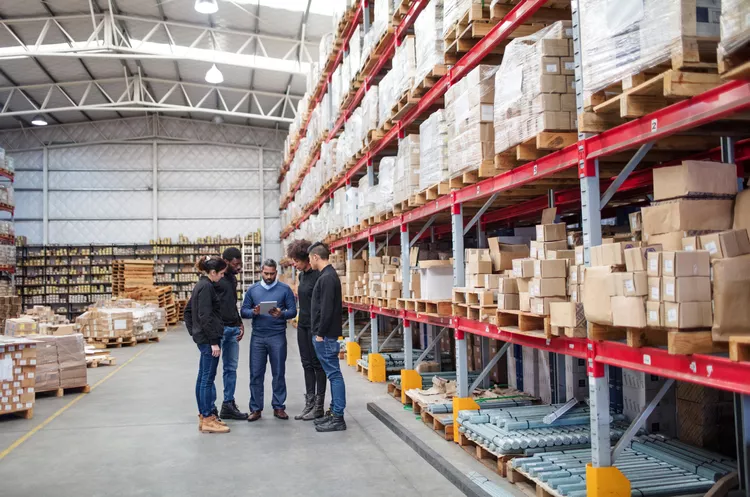

# **Wholesale Customers Segmentation: Unsupervised Machine Learning**

## **Problem statement**

* In this project, I am trying to segment wholesale customers based on their purchase behavior. The goal is to group similar customers together using kmeans Clustering, so that the business can understand different types of customers and design better marketing strategies.

* The dataset contains information about how much each customer spends on different product categories like Fresh, Milk, Grocery, etc. After clustering, we can find useful patterns — like which customers buy a lot of milk and grocery, and which ones are mostly buying fresh products. This helps in taking better business decisions.

## **Dataset Information**

### **Data Description:**

Channel:Type of customer –1 means Hotel, Restaurant, or Café type business (B2B) and 2 means Retail shop or individual customer (B2C)
(Nominal)

Region: Region where the customer is located – 1: Lisbon, 2: Oporto, 3: Other regions. (Nominal)

Fresh: Annual spending on fresh products. (Numeric)

Milk: Annual spending on milk products. (Numeric)

Grocery: Annual spending on grocery items. (Numeric)

Frozen: Annual spending on frozen foods. (Numeric
)
Detergents_Paper: Annual spending on detergents and paper products. (Numeric)

Delicassen: Annual spending on delicatessen products. (Numeric)

**Dataset Link:-** https://drive.google.com/file/d/1zUkq_R0_Hpzc8oByLlZpEN3hgV0kBpe2/view?usp=sharing

## **Data Inspection**

In [ ]:
import warnings   # importing necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from tabulate import tabulate
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist,squareform
from scipy.stats import skew, kurtosis, normaltest, shapiro, probplot, boxcox

In [ ]:
# loading dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#  Dataset inspecting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


* dataset does not contain any missing value
* dataset look clean and  all variables are in proper format

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


* After checking with describe(), it looks like some values are very high — so there might be outliers. Also, the data doesn’t look normally spread, it seems skewed.



In [ ]:
df.shape

(440, 8)

In [ ]:
# finding duplicate
df.duplicated().sum()

np.int64(0)

## **Exploratory Data Analysis (EDA)**

### **Categorical Data**

* **channel variable**


In [ ]:
df['Channel'].unique()

array([2, 1])

#### **Which channel have high number of customer**

,count
Channel,
1,298
2,142


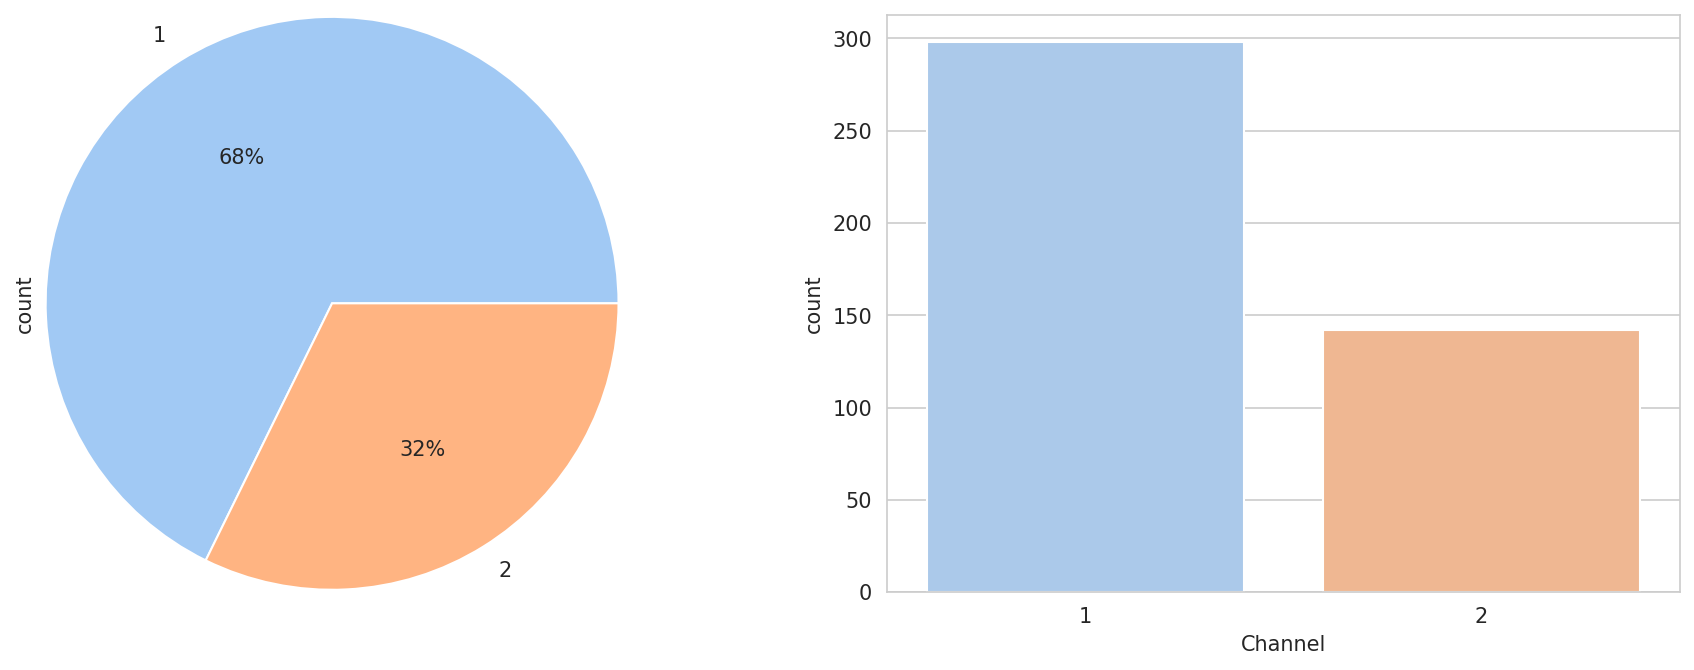

In [ ]:
# Set clean background style
sns.set_style('whitegrid')

# Create a wide figure
plt.figure(figsize=(15, 5), dpi=150)

# Pie chart of Channel distribution
plt.subplot(121)
df['Channel'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))

# Bar chart of Channel count
plt.subplot(122)
sns.countplot(data=df, x='Channel', palette='pastel')

# Display count of each Channel
df['Channel'].value_counts()


* The 'Channel' variable indicates through which channels customers make purchases, which can be Hotel/Restaurant/Café(1) or Retail(2). The variable type is categorical.

* There are 2 unique values. The channel coded with a weight of **1** is predominant. It can be noted that the distribution is imbalanced.

#### **Region variable**

In [ ]:
df['Region'].unique()

array([3, 1, 2])

#### **which region have high number of customer**

,count
Region,
3,316
1,77
2,47


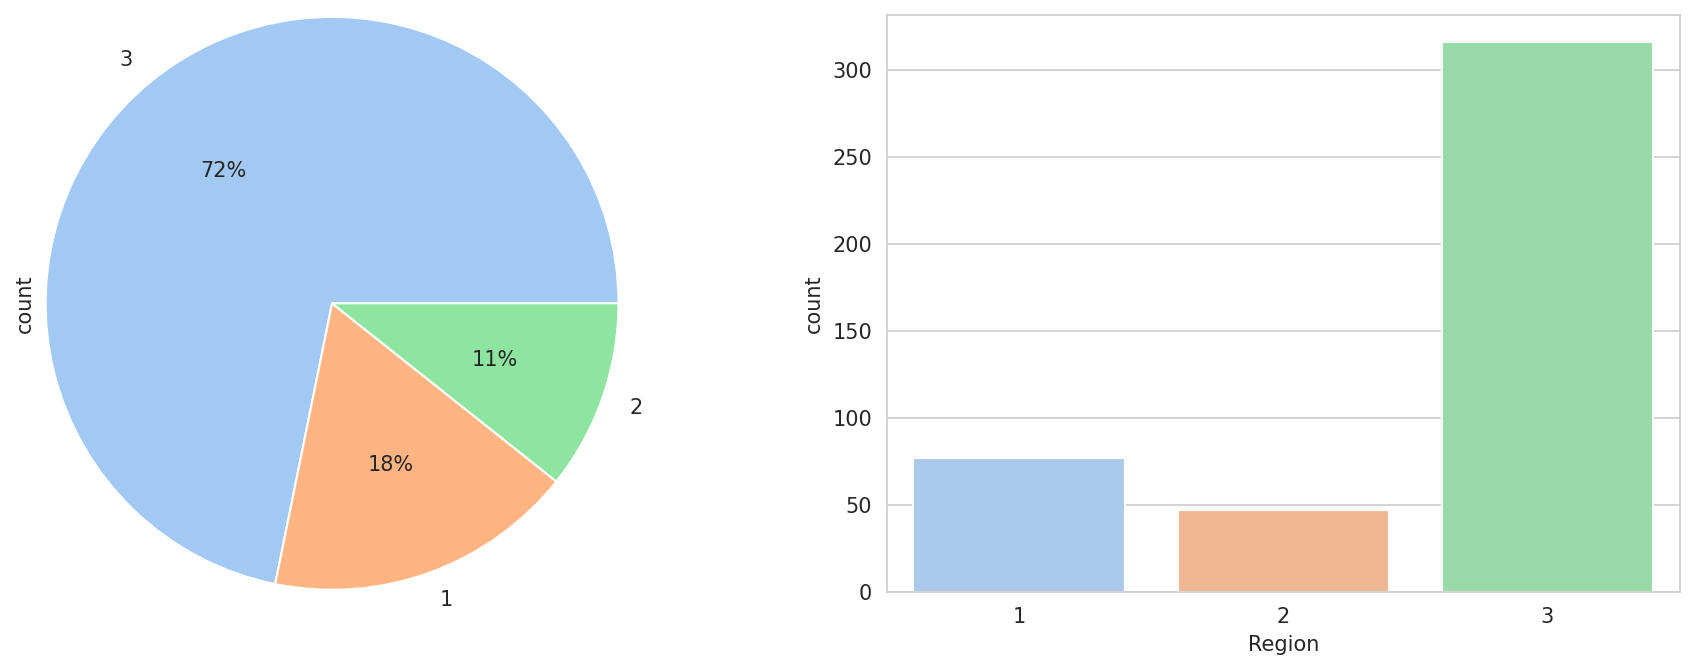

In [ ]:
# Set clean background style
sns.set_style('whitegrid')

# Create a wide figure
plt.figure(figsize=(15, 5), dpi=150)

# Pie chart of Region distribution
plt.subplot(121)
df['Region'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))

# Bar chart of Region count
plt.subplot(122)
sns.countplot(data=df, x='Region', palette='pastel')

# Show count of each Region
df['Region'].value_counts()


* The ‘Region’ variable tells us where the customers are located — either in Lisbon (1), Oporto (2), or Other Regions (3).
This is a categorical variable with 3 unique values.

* Most customers belong to the region coded as 3 (Other Regions), so this distribution is also imbalanced, even more than the Channel variable.



#### Now no need  take categorical variables in data because in clustering we only use numerical data

In [ ]:
# Drop categorical variables
dfnew=df.drop(['Region', 'Channel'], axis=1)

In [ ]:
dfnew.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

### Numerical Data

* 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'


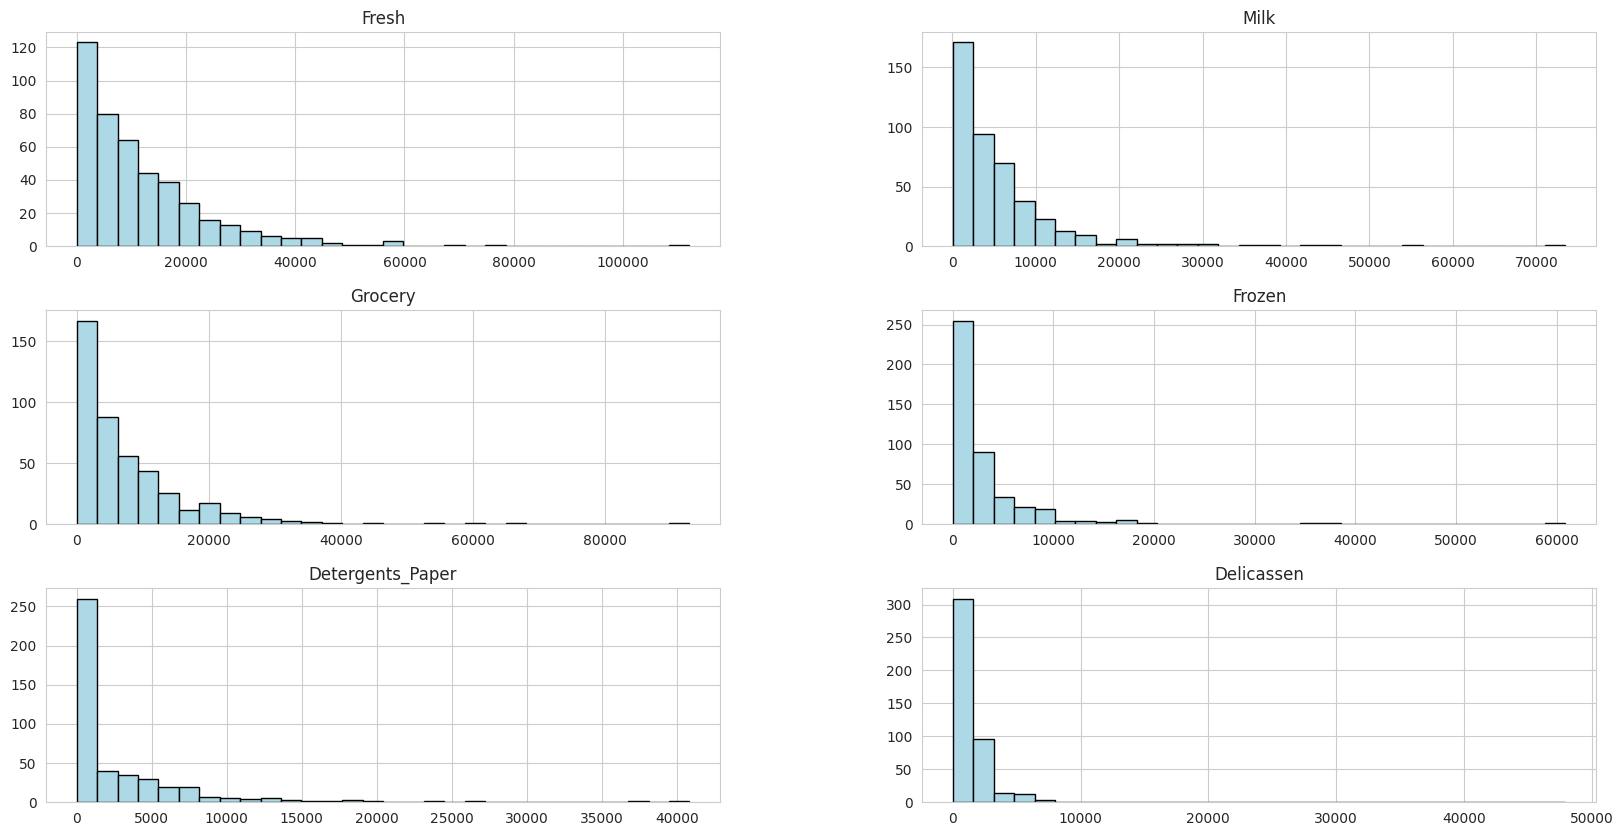

In [ ]:
dfnew.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black') # plot histogram for every variable
plt.show()

**From this output, we can infer that the distributions of variables are highly skewed, and there may be outliers.**

## **Data Preprocessing**

### **Skewness and Kurtosis**

In [ ]:
skewness = dfnew.skew()
kurtosisness = dfnew.kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness Coefficient', 'Skewness', 'Kurtosis Coefficient', 'Kurtosis']

table_data = []
for col in dfnew.columns:
    stat, p = normaltest(dfnew[col])
    normal_dist = 'Yes' if p >= 0.05 else 'No'
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'Highly skewed' if skewness[col] < -1 or skewness[col] > 1 else 'Symmetric or mildly skewed'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Very flat or sharp' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal or mildly flat'

    stat_sh, p_sh = shapiro(dfnew[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'

    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)


+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|     Variable     | Shapiro Test | Skewness Coefficient |   Skewness    | Kurtosis Coefficient |      Kurtosis      |
+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|      Fresh       |      No      |        2.5613        | Highly skewed |       11.5364        | Very flat or sharp |
|       Milk       |      No      |        4.0538        | Highly skewed |       24.6694        | Very flat or sharp |
|     Grocery      |      No      |        3.5874        | Highly skewed |       20.9147        | Very flat or sharp |
|      Frozen      |      No      |        5.9080        | Highly skewed |       54.6893        | Very flat or sharp |
| Detergents_Paper |      No      |        3.6319        | Highly skewed |       19.0095        | Very flat or sharp |
|    Delicassen    |      No      |       11.151

The distributions are highly skewed and flat. If we perform clustering in this state, the skewed values in the variables can lead to extreme results in distance measurements. To avoid this, we will take the logarithm of the data. This process can make the distribution of the data more symmetric and improve clustering results.

Points to consider before applying the logarithmic transformation:
1. Logarithmic transformation is particularly effective for right-skewed data.
2. There should be no zero or negative values in the dataset.

In [ ]:
# log transform
df1 = np.log(dfnew)

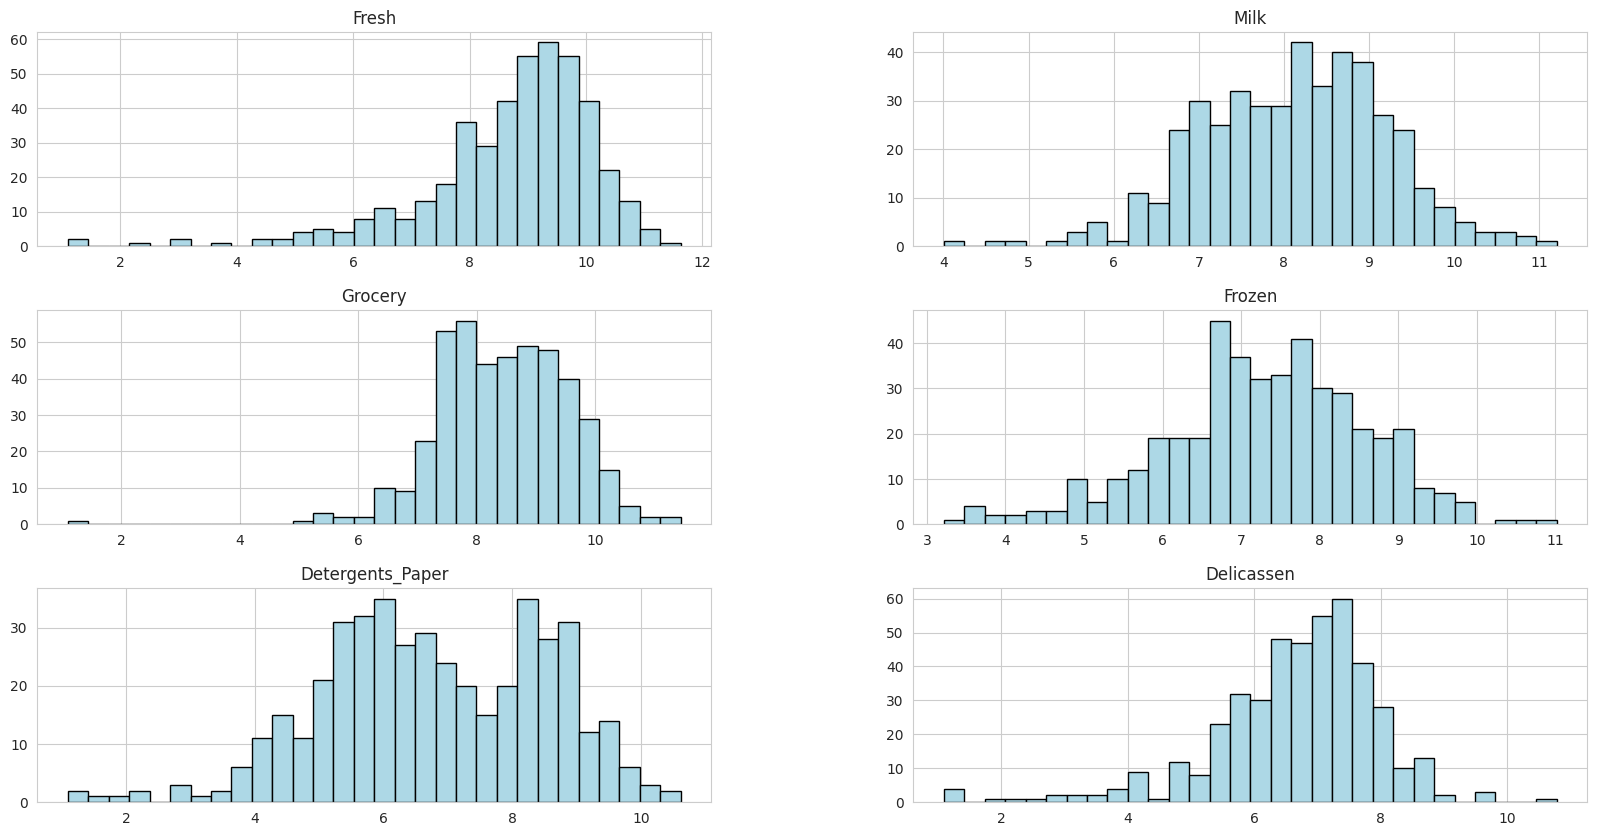

In [ ]:
df1.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

After log transformation we can  see  that data is now  not much skewed

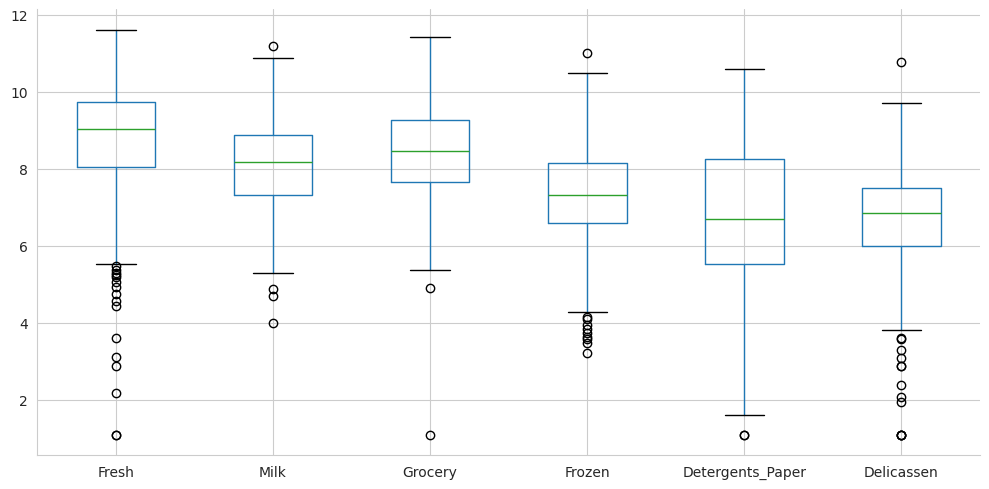

In [ ]:
# now lets identify outlier through boxplot
plt.figure(figsize=(10, 5))
df1.boxplot()
sns.despine()
plt.tight_layout()
plt.show()

### **Outlier Analysis**

Let's identify outliers and use the capping method to equalize these values to lower and upper bounds.

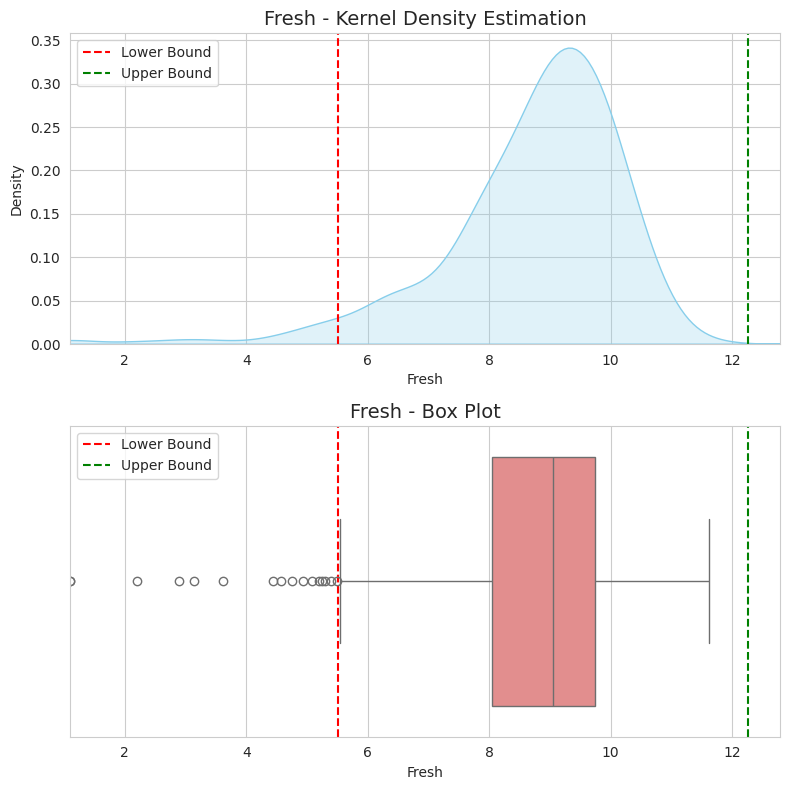

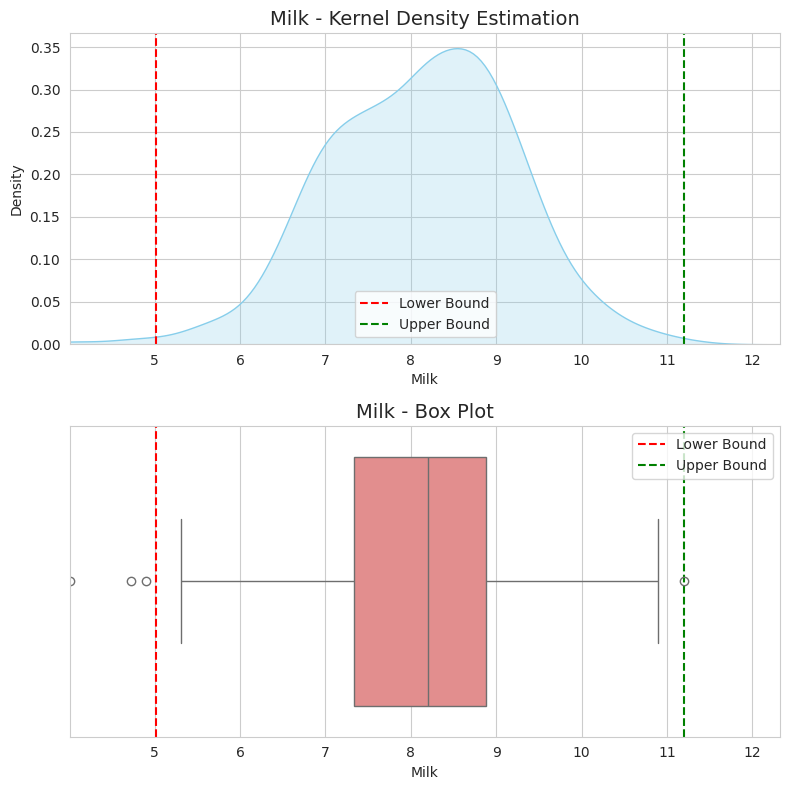

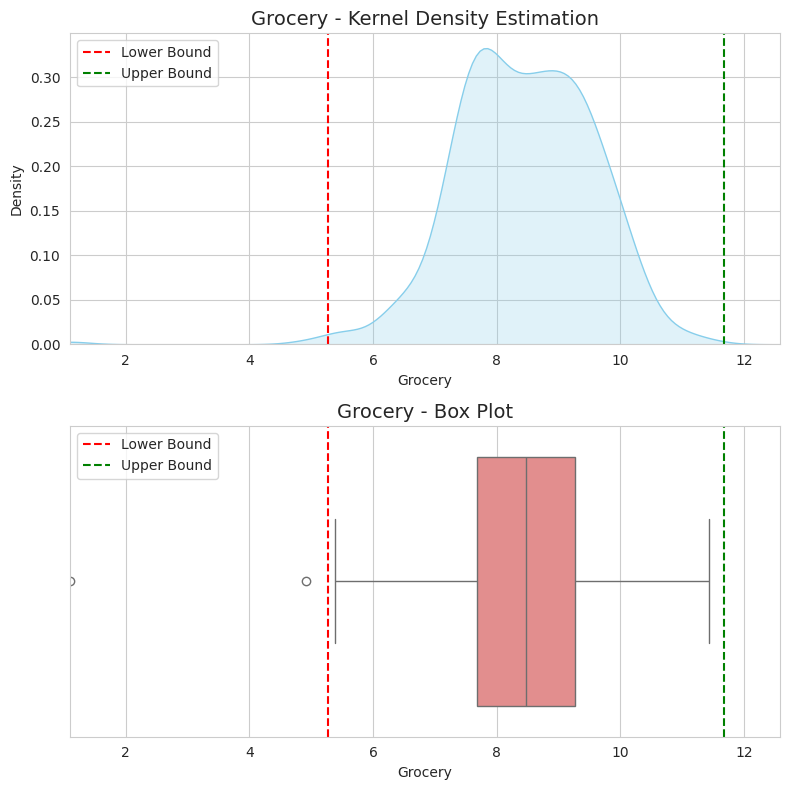

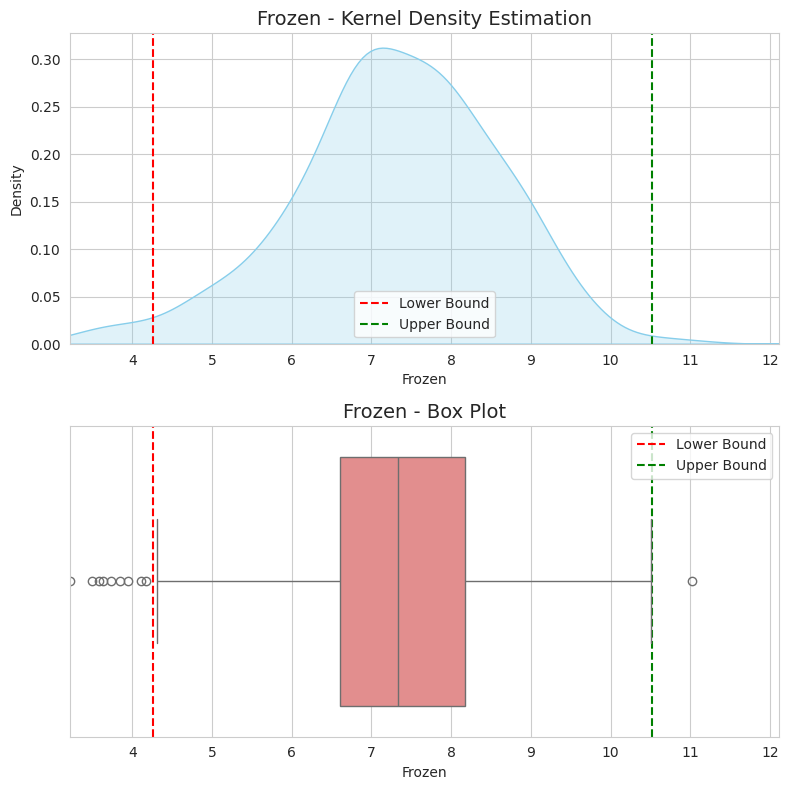

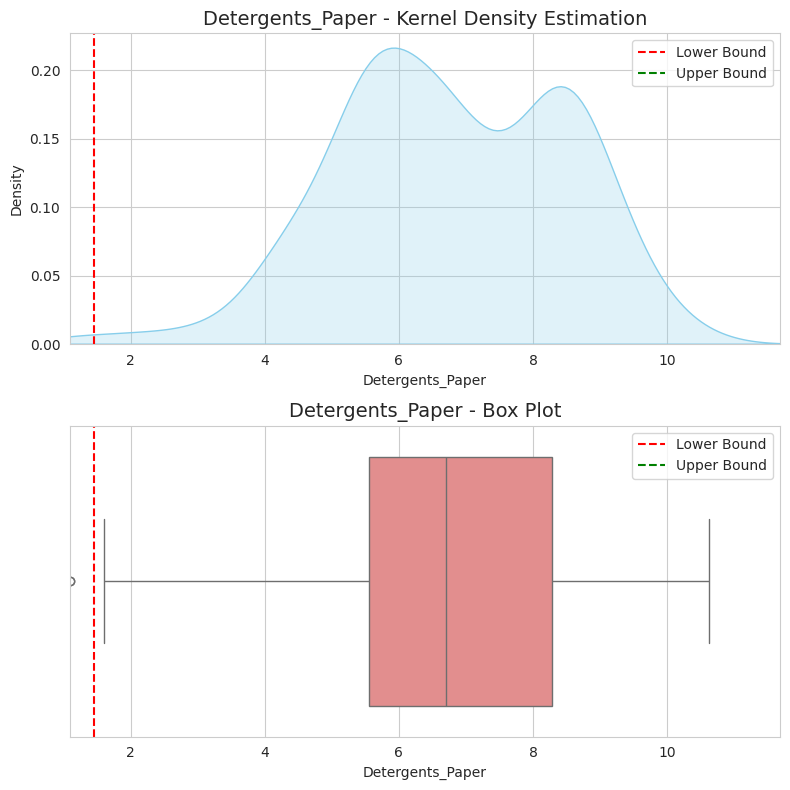

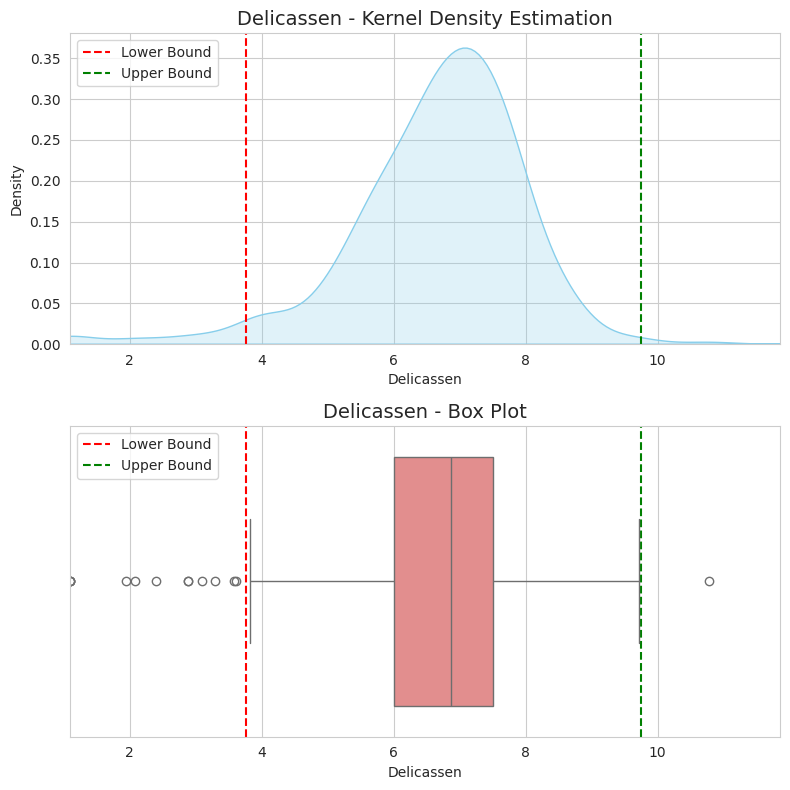

In [ ]:
# Looping through all the columns in the dataframe
for i in df1.keys():
    # Calculating 25th and 75th percentile
    q25, q75 = np.percentile(df1[i], [25, 75])

    # Finding IQR (Inter Quartile Range)
    iqr = q75 - q25

    # Calculating lower and upper bounds for outliers using IQR rule
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

    # Creating a new figure for each feature
    plt.figure(figsize=(8, 8))

    # First subplot for KDE (distribution plot)
    plt.subplot(211)
    plt.xlim(df1[i].min(), df1[i].max() * 1.1)  # Setting x-axis range
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')  # Red line for lower bound
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')  # Green line for upper bound
    sns.kdeplot(data=df1[i], fill=True, color='skyblue')  # KDE plot to see distribution
    plt.legend()
    plt.title(f'{i} - Kernel Density Estimation', fontsize=14)

    # Second subplot for Boxplot (to check outliers visually)
    plt.subplot(212)
    plt.xlim(df1[i].min(), df1[i].max() * 1.1)  # Setting x-axis range same as above
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.boxplot(x=df1[i], color='lightcoral')  # Boxplot to check outliers
    plt.legend()
    plt.title(f'{i} - Box Plot', fontsize=14)

    # Adjusting layout to avoid overlapping
    plt.tight_layout()

    # Showing the plot
    plt.show()


In [ ]:
# Loop through each column in the dataframe
for i in df1.keys():
    # Calculate the 25th and 75th percentiles
    q25, q75 = np.percentile(df1[i], [25, 75])

    # Calculate the Interquartile Range (IQR)
    iqr = q75 - q25

    # Define the lower and upper bounds using 1.5 * IQR rule
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

    # Replace values lower than lower_bound with the lower_bound (cap the outliers)
    df1.loc[df1[i] < lower_bound, i] = lower_bound

    # Replace values greater than upper_bound with the upper_bound
    df1.loc[df1[i] > upper_bound, i] = upper_bound


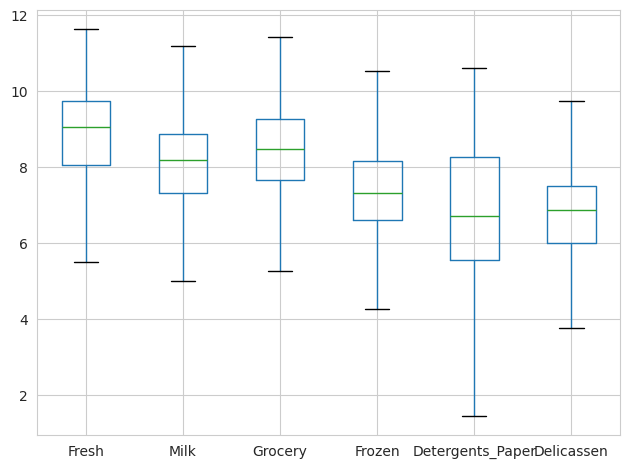

In [ ]:
df1.boxplot()
plt.tight_layout()
plt.show()

* Now we can see that there are no outliers present in the dataset.

In [ ]:
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### **Standardization**

Since we will perform clustering, the distances between values are important. In this context, standardizing the data can reduce the impact of the units or value ranges in which variables are measured.

In [ ]:
scaler = StandardScaler() # using standard scaler because data follow normal distribution
df_m = scaler.fit_transform(df1)

## **Model** **Training ,evaluation  and finding insight**

### **K-Means**

#### **Finding optimum cluster using silhouette_score**

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Function to perform silhouette analysis from 2 to n clusters
def silhouette_analysis(n):
    for n_clusters in range(2, n):  # Try different cluster counts
        km = KMeans(n_clusters=n_clusters)  # Create KMeans model
        preds = km.fit_predict(df_m)  # Fit and predict cluster labels
        centers = km.cluster_centers_  # Get cluster centers

        # Calculate silhouette score (higher means better cluster separation)
        score = silhouette_score(df_m, preds, metric='euclidean')
        print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

        # Visualize silhouette plot for each cluster count
        visualizer = SilhouetteVisualizer(km)
        visualizer.fit(df_m)
        visualizer.poof()  # Show the plot


For n_clusters = 2, silhouette score is 0.2873426444898568


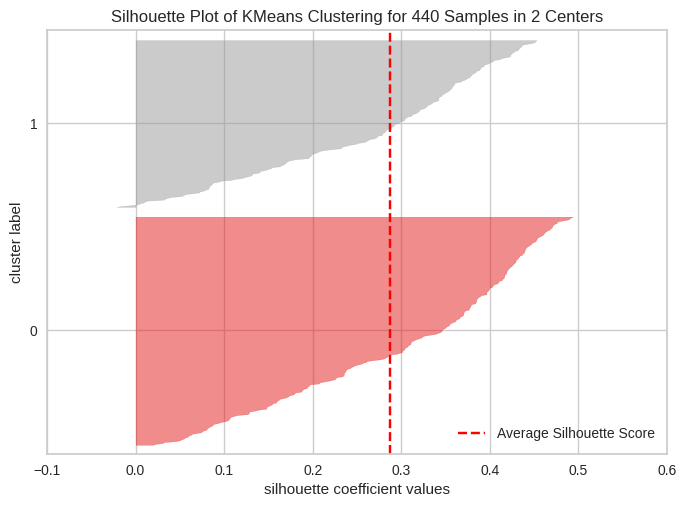

For n_clusters = 3, silhouette score is 0.20519045402331645


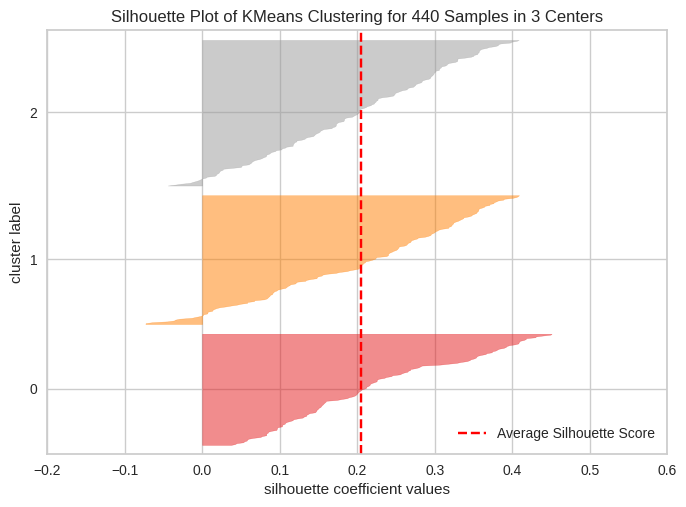

For n_clusters = 4, silhouette score is 0.18717391311283468


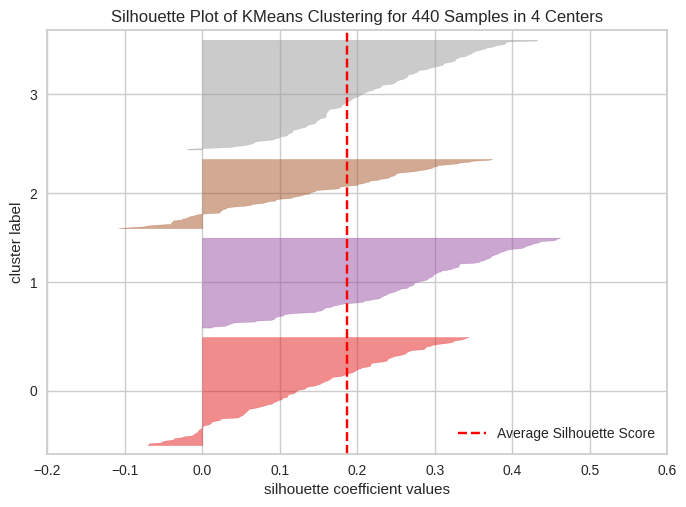

For n_clusters = 5, silhouette score is 0.1767317279985398


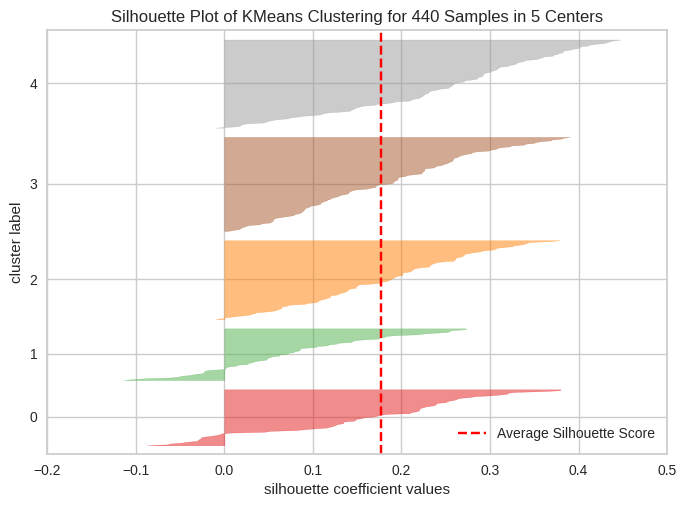

For n_clusters = 6, silhouette score is 0.1847184226018634


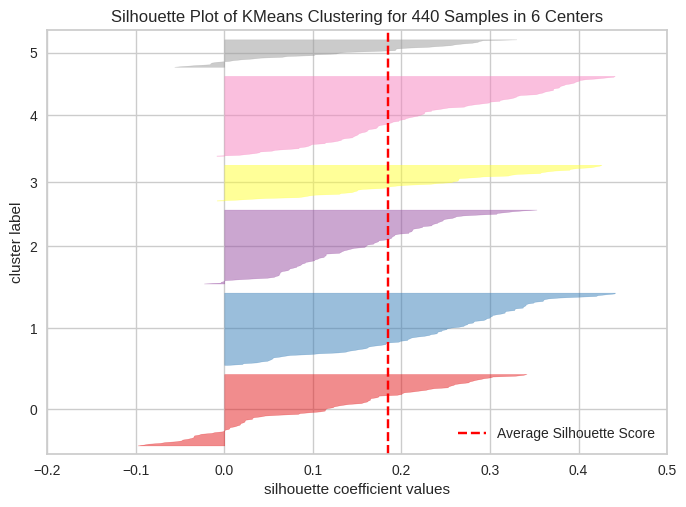

For n_clusters = 7, silhouette score is 0.187757691682744


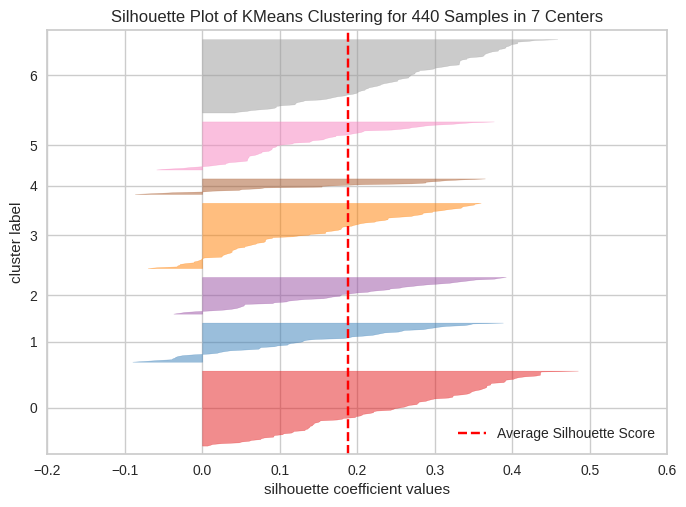

For n_clusters = 8, silhouette score is 0.20083053797964578


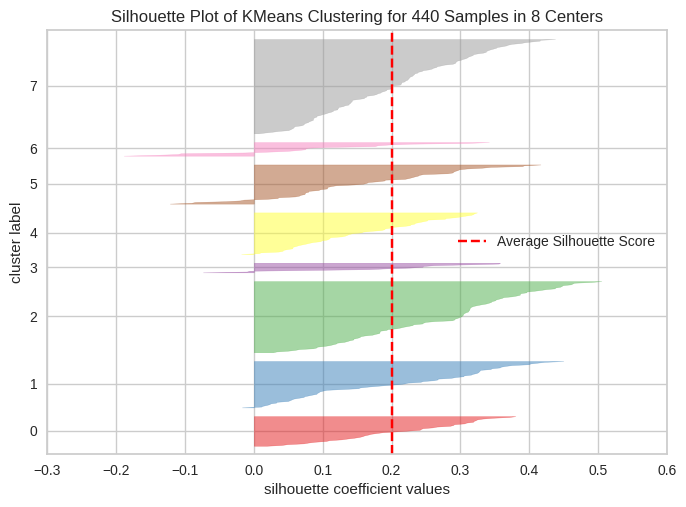

For n_clusters = 9, silhouette score is 0.18252240446142712


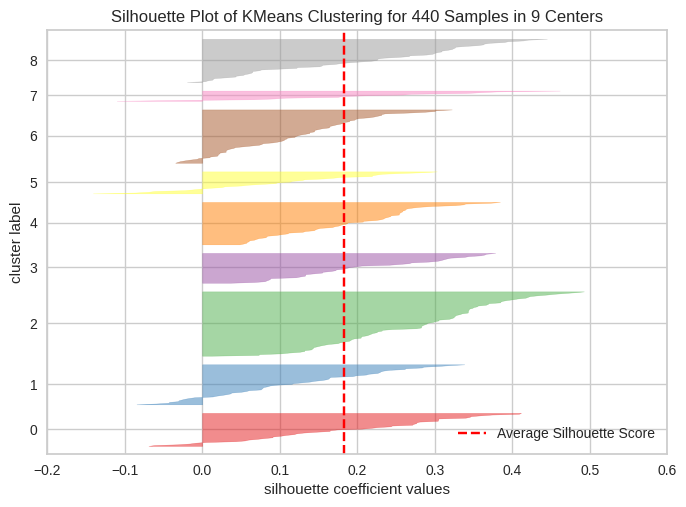

In [ ]:
silhouette_analysis(10) # calling function

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(df_m)
    score = silhouette_score(df_m, labels)
    print(f"K={k} → Silhouette Score: {score:.4f}")

K=2 → Silhouette Score: 0.2867
K=3 → Silhouette Score: 0.2516
K=4 → Silhouette Score: 0.2136
K=5 → Silhouette Score: 0.1862
K=6 → Silhouette Score: 0.1823
K=7 → Silhouette Score: 0.1930
K=8 → Silhouette Score: 0.1871
K=9 → Silhouette Score: 0.1860


* Based on the silhouette score, the optimal number of clusters is 2, as it gives the highest score.
However, to perform a deeper segmentation and gain more insights about different customer groups, I decided to use 3 clusters for better analysis.

#### **Model training and assigning cluster labels**

In [ ]:
# Create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3,random_state=42)

# Fit the model on the normalized dataset
kmeans.fit(df_m)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Copy original dataframe to keep it safe
df_kmeans = df.copy()

# Add a new column 'Cluster' to original data with predicted cluster labels
df_kmeans['Cluster'] = labels


#### **Visualizing cluster and finding insight**

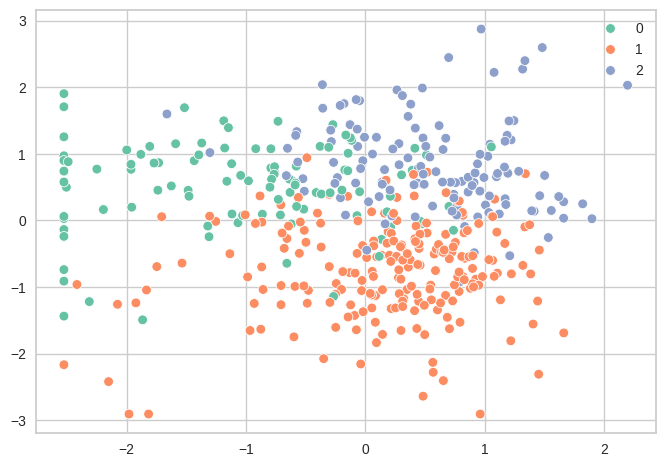

In [ ]:
sns.scatterplot(x=df_m[:, 0], y=df_m[:, 1], hue=labels, palette='Set2')
plt.show()

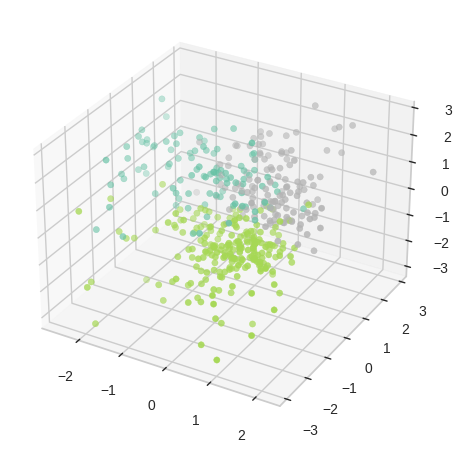

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_m[:, 0], df_m[:, 1], df_m[:, 2], c=labels, cmap='Set2')
plt.show()

In [ ]:
df_kmeans.groupby('Cluster').mean()# for finding inside summarising data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.650000,2.540000,3355.430000,7219.450000,12305.840000,709.590000,5282.080000,896.240000
1,1.014218,2.497630,12034.990521,1976.592417,2485.478673,3282.957346,423.895735,895.232227
2,1.573643,2.620155,18645.000000,10940.705426,13515.829457,4558.038760,5040.364341,3042.054264


#### **Visualize cluster  side by side comparison**

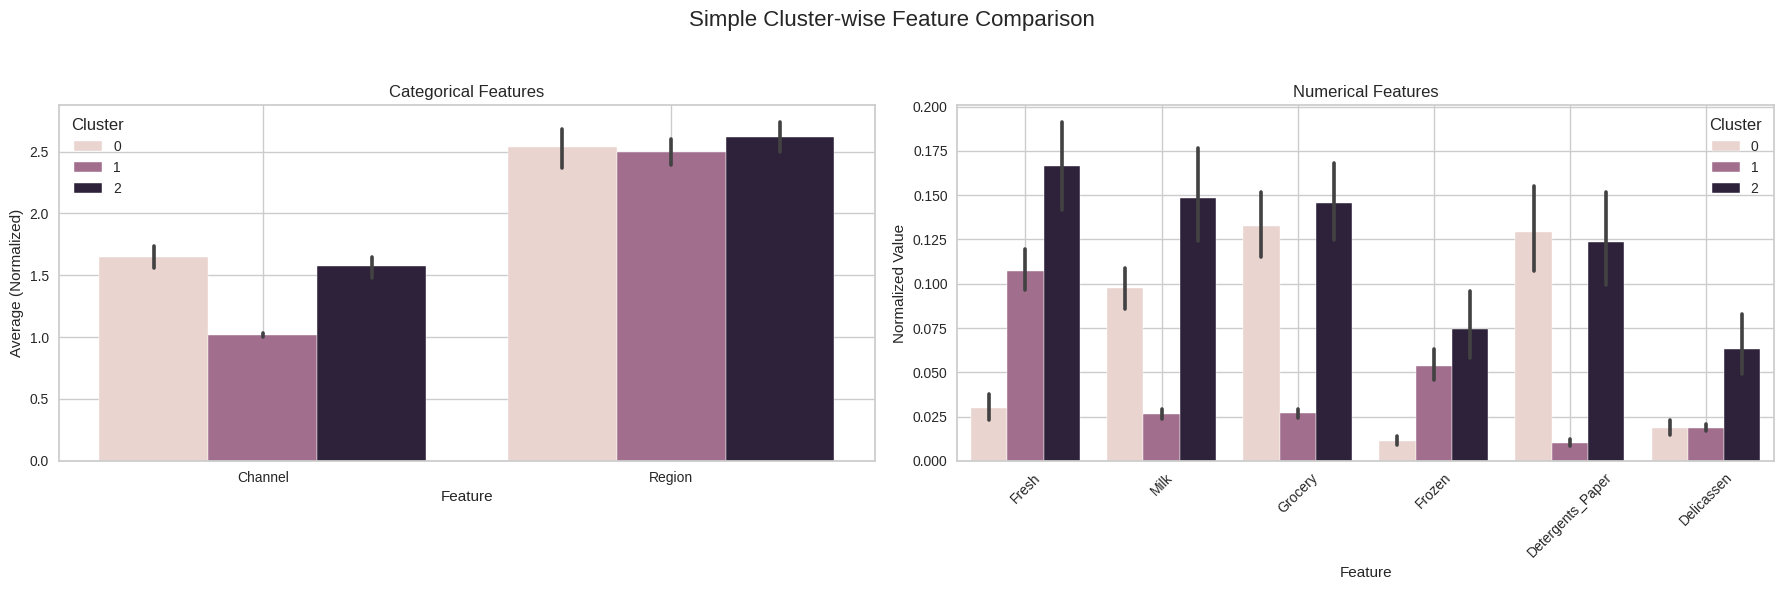

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Split categorical and numerical features
cat_features = ['Channel', 'Region']
num_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Normalize numerical features for better visualization
df_norm = df_kmeans.copy()
scaler = MinMaxScaler()
df_norm[num_features] = scaler.fit_transform(df_norm[num_features])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Categorical Plot
df_cat_melt = df_norm.melt(id_vars='Cluster', value_vars=cat_features, var_name='Feature', value_name='Value')
sns.barplot(data=df_cat_melt, x='Feature', y='Value', hue='Cluster', ax=axes[0])
axes[0].set_title("Categorical Features")
axes[0].set_ylabel("Average (Normalized)")
axes[0].grid(True)

# Numerical Plot
df_num_melt = df_norm.melt(id_vars='Cluster', value_vars=num_features, var_name='Feature', value_name='Value')
sns.barplot(data=df_num_melt, x='Feature', y='Value', hue='Cluster', ax=axes[1])
axes[1].set_title("Numerical Features")
axes[1].set_ylabel("Normalized Value")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.suptitle("Simple Cluster-wise Feature Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### **Cluster-0 analysis**

Cluster 0 – Possibly Retailers with Grocery Focus
Channel is nearly 1.6 → Mix of (hotel,restaurant,cafe) and Retail, more  type of customer

Very high Grocery, Milk, Detergents_Paper

Low Fresh, Frozen

* Insight: These are probably retail stores buying in bulk to resell groceries, milk & cleaning supplies.

#### **Cluster-1 analysis**

Cluster 1 – Possibly Hotel/Restaurant/cafe customers

High Fresh and mid Frozen product purchase

Low Milk, Grocery, Detergents_Paper

These might be restaurants or hotels who buy lots of fresh/frozen food but not retail items

* Insight: This group focuses on food for cooking, not for reselling.

#### **Cluster-2 analysis**

Cluster 2 – Heavy Buyers / Premium Businesses
Highest in almost everything

Especially high in Fresh, Milk, Grocery, Frozen, Delicassen

Channel is nealy 1.6 → Mostly Retail, some (hotel,restaurant,cafe)

* Insight: These could be big hotels or supermarkets, buying a wide variety in large quantity. This is our premium  and valuable customer segment.

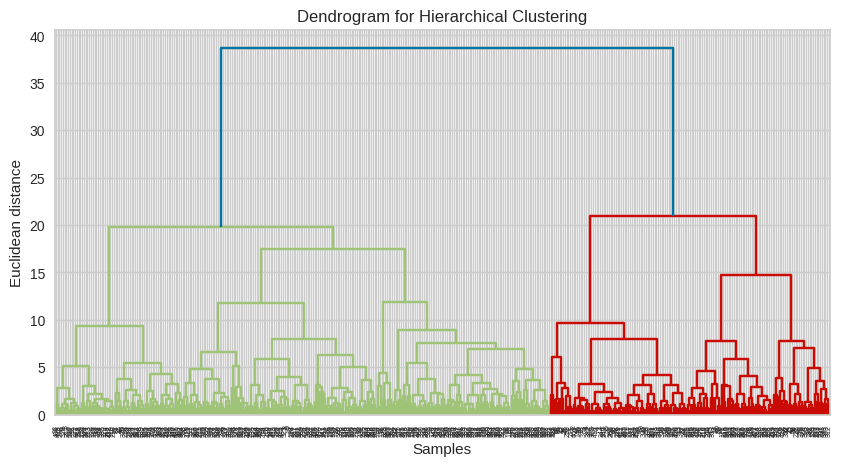

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
Z = linkage(df_m, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean distance")
plt.show()

# Choose number of clusters (for example 3)
hc_labels = fcluster(Z, t=3, criterion='maxclust')

# Add labels to dataframe
df1['HC_Cluster'] = hc_labels


In [38]:
df1.groupby('HC_Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
HC_Cluster,,,,,,
1,9.068912,7.616876,7.872511,7.624947,5.814491,6.599840
2,9.269707,9.267160,9.562385,7.592002,8.554572,7.579977
3,7.331070,8.783954,9.390193,5.949618,8.461968,6.230390


In [39]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_m)

# Add cluster labels to dataframe
df1['DBSCAN_Cluster'] = dbscan_labels

# Count of points per cluster
print(df1['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    403
-1     37
Name: count, dtype: int64


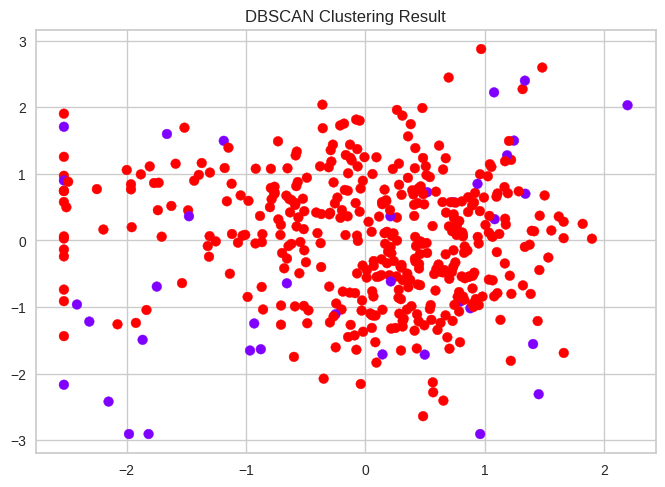

In [40]:
plt.scatter(df_m[:,0], df_m[:,1], c=dbscan_labels, cmap='rainbow')
plt.title("DBSCAN Clustering Result")
plt.show()


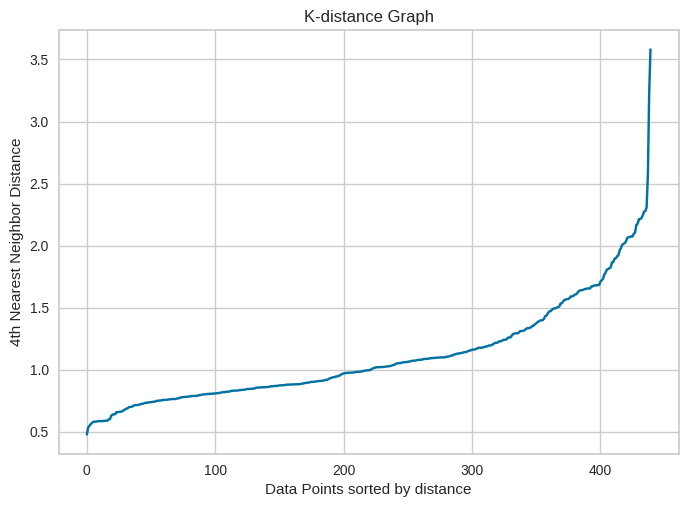

In [41]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Find the optimal eps
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_m)
distances, indices = nbrs.kneighbors(df_m)

# Sort distances and plot
distances = np.sort(distances[:,4])  # 4 because n_neighbors=5
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(df_m)

df1['DBSCAN_Cluster'] = labels

# Summary
print(df1['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    357
-1     80
 1      3
Name: count, dtype: int64
